# Projekt PRiAD : Rozpoznawanie gestów na podstawie pomiarów aktywności mięśni z wykorzystaniem danych z serwisu Kaggle.

## Opis problemu:

Temat projektu jak wskazuje tytuł dotyczy zbioru danych, które mają posłużyć do rozpoznawania gestów wykonywanych przez dłoń człowieka. W tym celu wykonane zostaną następujące kroki: analiza zbioru danych, określenie podstawowych wartości statystycznych, zbadanie korelacji poszczególnych argumentów, porównanie argumentów z podziałem na klasy. Na podstawie uzyskanych informacji zostanie przygotowany zbiór danych do analizy grupowania i klasyfikacji. 

## Analiza dostępnych danych
Określenie liczby obiektów, liczby klas, zakresy zmienności poszczególnych atrybutów, ich wartości statystycznych, poziom wypełnienia kolumn, ilość unikalnych danych.

Importowanie potrzebnych bibliotek i wczytanie danych, stworzenie jednego dużego zbioru danych.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


frames = [pd.read_csv("data/" + str(f) + ".csv") for f in range(0, 4)]
columns = [("m"+str(m) + "s" + str(s)) for s in range(1,9)for m in range(1,9)] + ["class"]
for frame in frames:
    frame.columns = columns
df = pd.concat(frames, sort=False)

Określenie liczby obiektów:

In [2]:
num_of_objects = len(df.index)
print("liczba obiektów: ", num_of_objects)

liczba obiektów:  11674


Określenie liczby klas:

In [3]:
num_of_classes = len(df['class'].unique())
print("liczba klas: ", num_of_classes)

liczba klas:  4


Zbadanie zakresu wartości atrybutów:

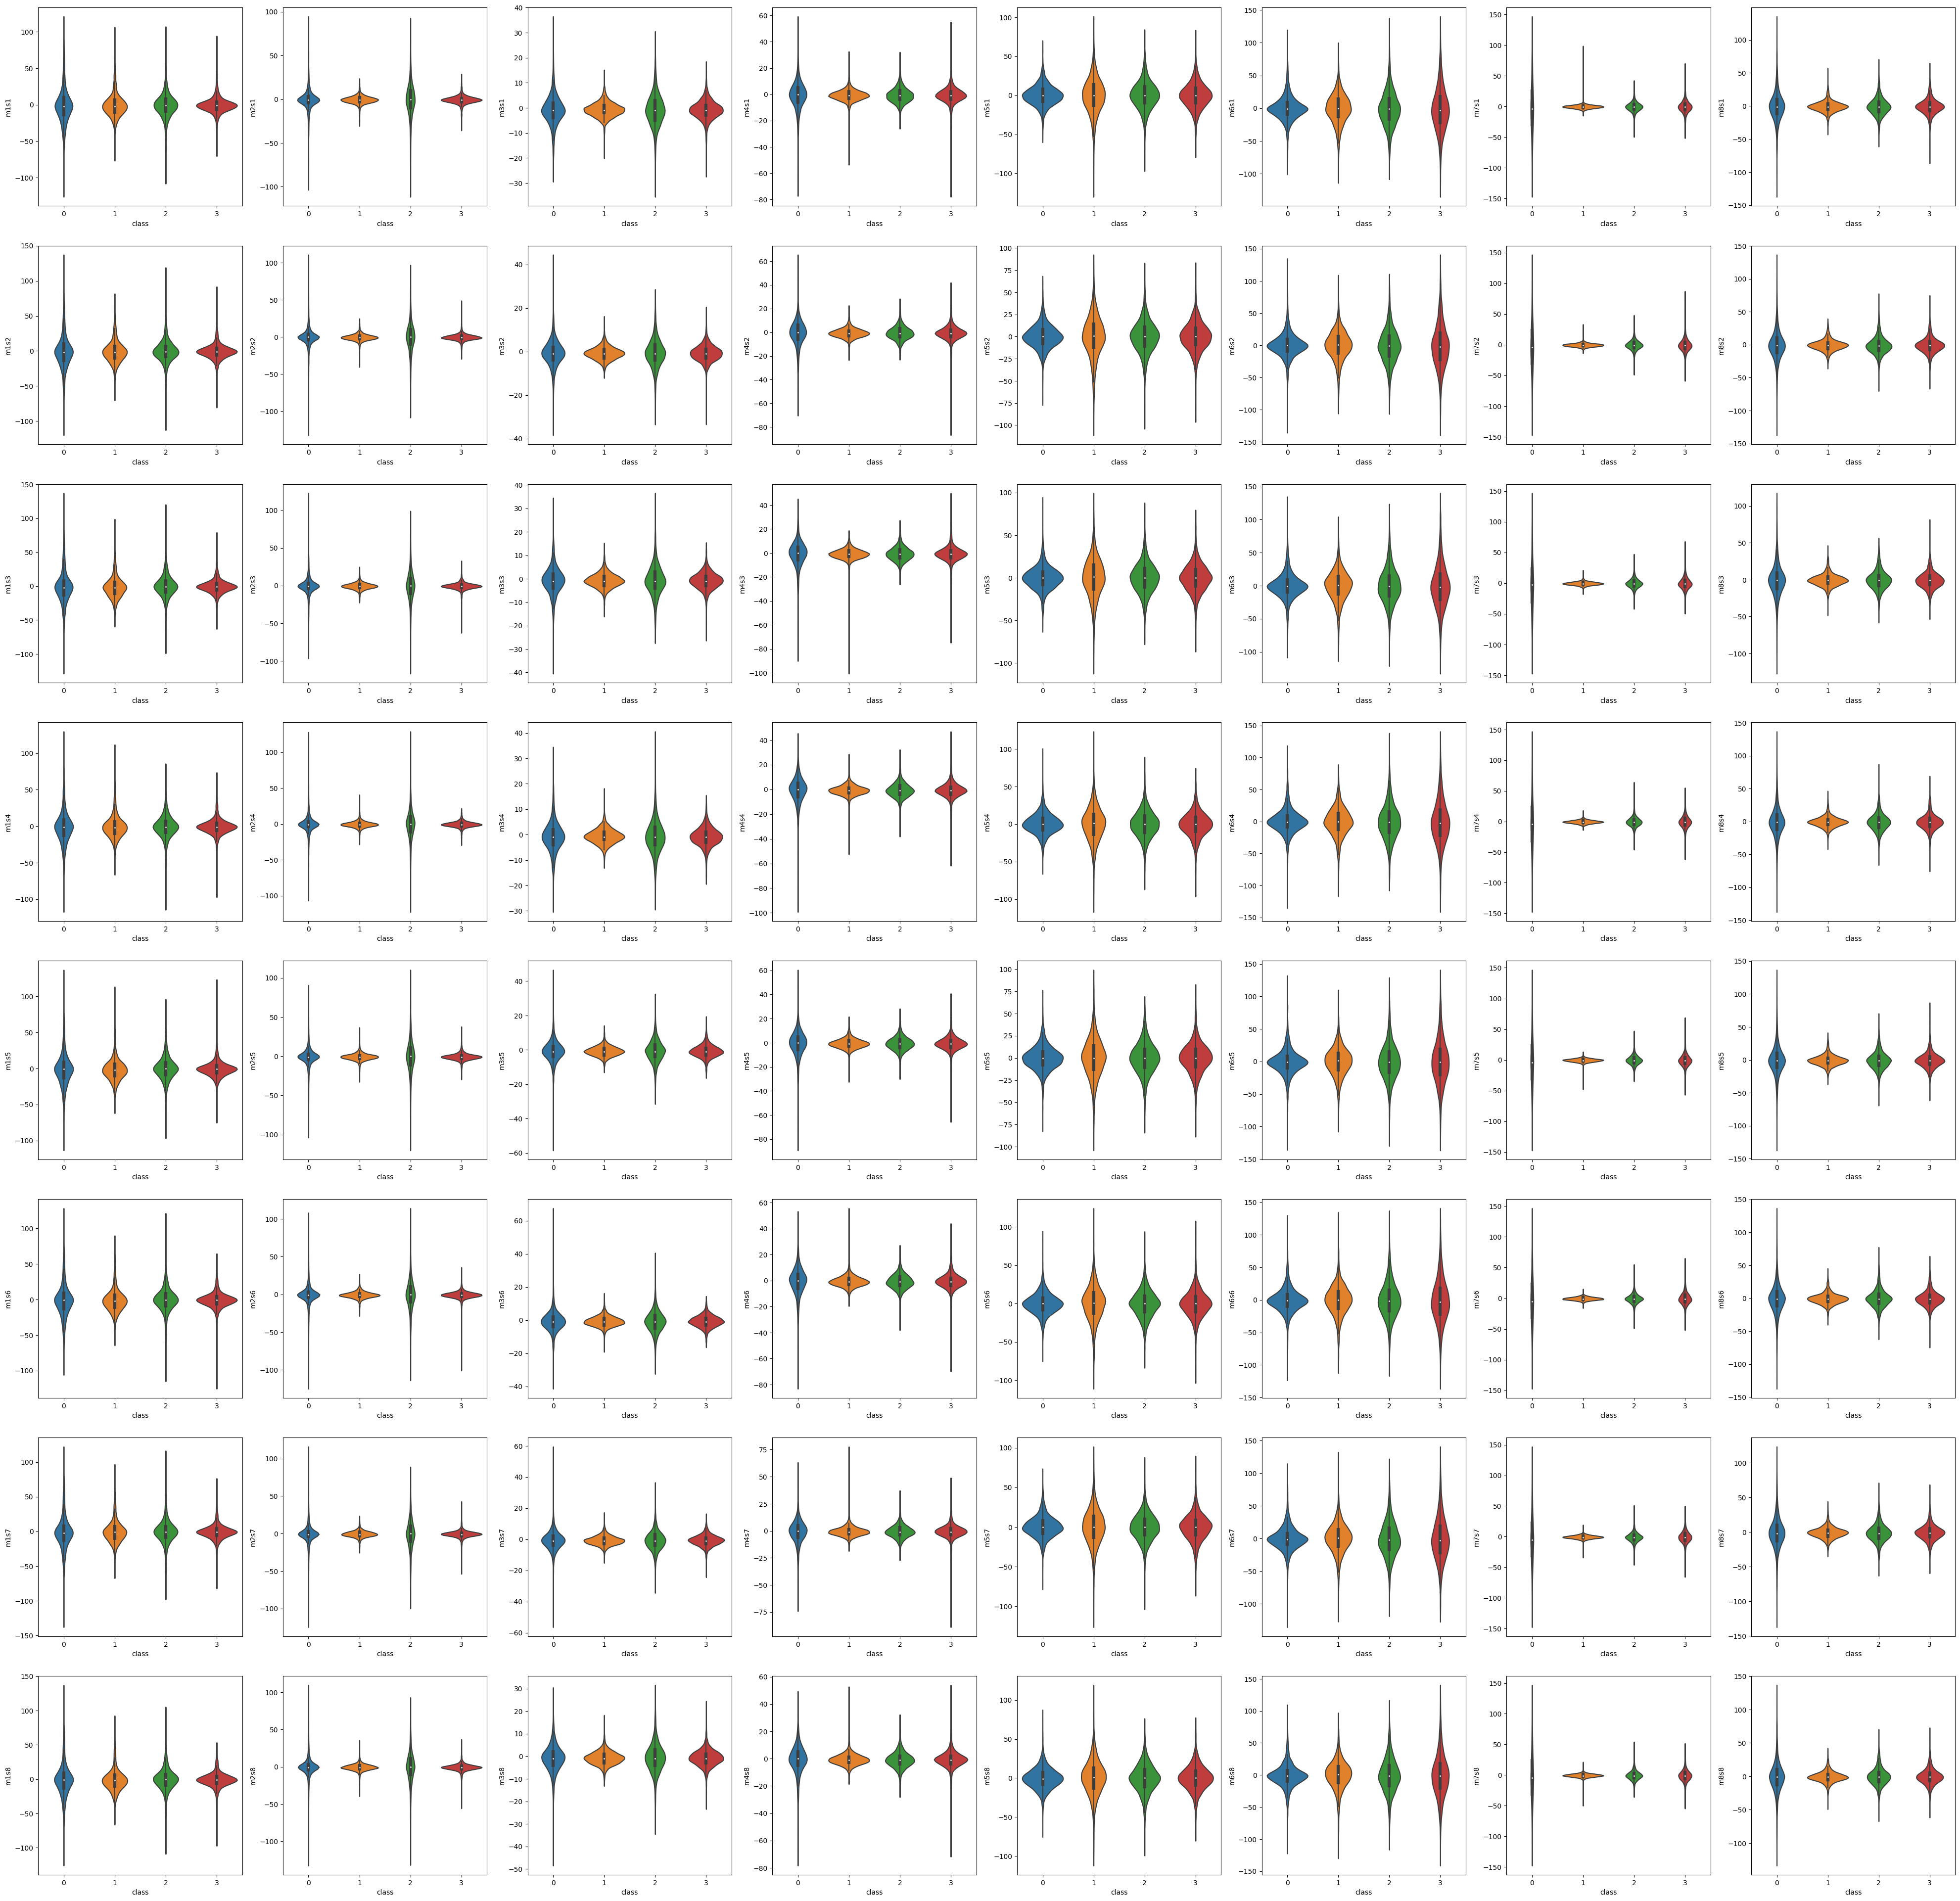

In [4]:
plt.figure(figsize=(50,50), dpi = 100)
for i in range(1,65):
    plt.subplot(8,8,i)
    sns.violinplot(x=df['class'], y=df.columns[i-1], data=df)

## Ja wolę pudełka, i jeśli chodzi o określenie rozpiętości argumentów z podziałe na klasy to proponuje to:

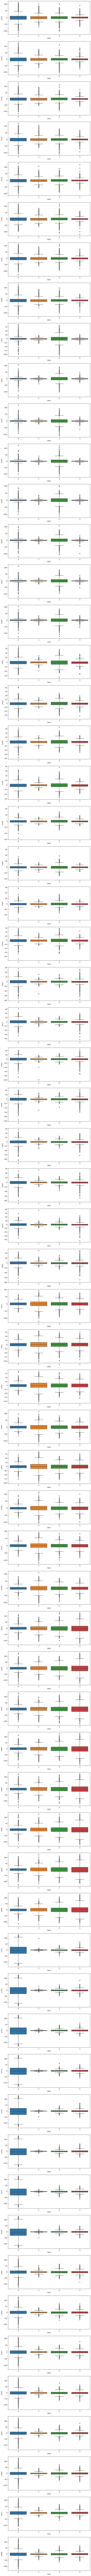

In [5]:
plt.figure(figsize=(10,320), dpi= 80)
index = 0
for i in range(1,9):
    for j in range(1,9):
        index = index + 1
        plt.subplot(64,1,index)
        name="m"+str(i)+"s"+str(j)
        sns.boxplot(x="class", y=name, data=df)

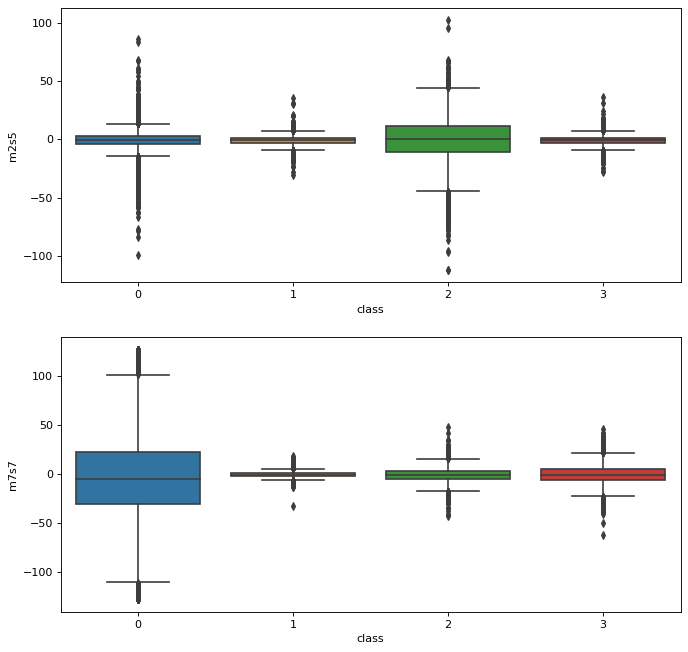

In [6]:
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(2,1,1)
sns.boxplot(x="class", y="m2s5", data=df)
plt.subplot(2,1,2)
sns.boxplot(x="class", y="m7s7", data=df)

Zbadanie wartości statystycznych:

In [4]:
df_without_class = df.drop(['class'], axis=1)
df_without_class.describe()

m1s1          m2s1          m3s1          m4s1          m5s1  \
count  11674.000000  11674.000000  11674.000000  11674.000000  11674.000000   
mean      -0.520644     -0.728199     -0.738393     -0.729998     -0.159757   
std       18.567059     11.767147      4.989693      7.442282     17.852132   
min     -116.000000   -104.000000    -33.000000    -75.000000   -121.000000   
25%       -9.000000     -4.000000     -3.000000     -4.000000    -10.000000   
50%       -1.000000     -1.000000     -1.000000     -1.000000      0.000000   
75%        7.000000      3.000000      2.000000      3.000000     10.000000   
max      111.000000     90.000000     34.000000     55.000000     92.000000   

               m6s1          m7s1          m8s1          m1s2          m2s2  \
count  11674.000000  11674.000000  11674.000000  11674.000000  11674.000000   
mean      -0.552253     -1.262978     -0.654960     -0.665667     -0.652390   
std       25.810290     25.074413     15.398179     18.126643     11.841696   
min     -122.000000   -128.000000   -128.000000   -110.000000   -128.000000   
25%      -15.000000     -6.000000     -8.000000     -9.000000     -4.000000   
50%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
75%       13.000000      4.000000      6.000000      6.000000      3.000000   
max      127.000000    127.000000    126.000000    127.000000    106.000000   

       ...          m7s7          m8s7          m1s8          m2s8  \
count  ...  11674.000000  11674.000000  11674.000000  11674.000000   
mean   ...     -1.624893     -0.931043     -0.839644     -0.740278   
std    ...     25.296251     15.158873     18.197682     12.007060   
min    ...   -128.000000   -128.000000   -116.000000   -128.000000   
25%    ...     -6.000000     -8.000000     -9.000000     -4.000000   
50%    ...     -1.000000     -1.000000     -1.000000     -1.000000   
75%    ...      3.000000      6.000000      6.000000      3.000000   
max    ...    127.000000    114.000000    127.000000    105.000000   

               m3s8          m4s8          m5s8          m6s8          m7s8  \
count  11674.000000  11674.000000  11674.000000  11674.000000  11674.000000   
mean      -0.768717     -0.705671     -0.148278     -0.378020     -1.443807   
std        4.969706      7.385313     17.841925     25.553998     25.258353   
min      -46.000000    -74.000000   -103.000000   -128.000000   -128.000000   
25%       -3.000000     -4.000000    -10.000000    -14.000000     -6.000000   
50%       -1.000000     -1.000000      0.000000     -1.000000     -1.000000   
75%        2.000000      3.000000     10.000000     13.000000      3.000000   
max       29.000000     51.000000    110.000000    127.000000    127.000000   

               m8s8  
count  11674.000000  
mean      -0.609303  
std       15.531573  
min     -124.000000  
25%       -8.000000  
50%       -1.000000  
75%        6.000000  
max      127.000000  

[8 rows x 64 columns]

Zbadanie poziomu wypełnienia column:

In [4]:
x = df.isna().sum()
#nie wiem jak to jakoś ciekawiej przedstawić - może wykres ?
x.sum()

0

Zbadanie ilości unikalnych datych:

In [5]:
unique_values = [df[column].unique() for column in df.columns]
num_of_unique_values = sum([len(array) for array in unique_values])
print("Numer wartości unikalnych ", num_of_unique_values)

Numer wartości unikalnych  10443


Analiza korelacji między zmiennymi z wyłączeniem zmiennej określającej klase.

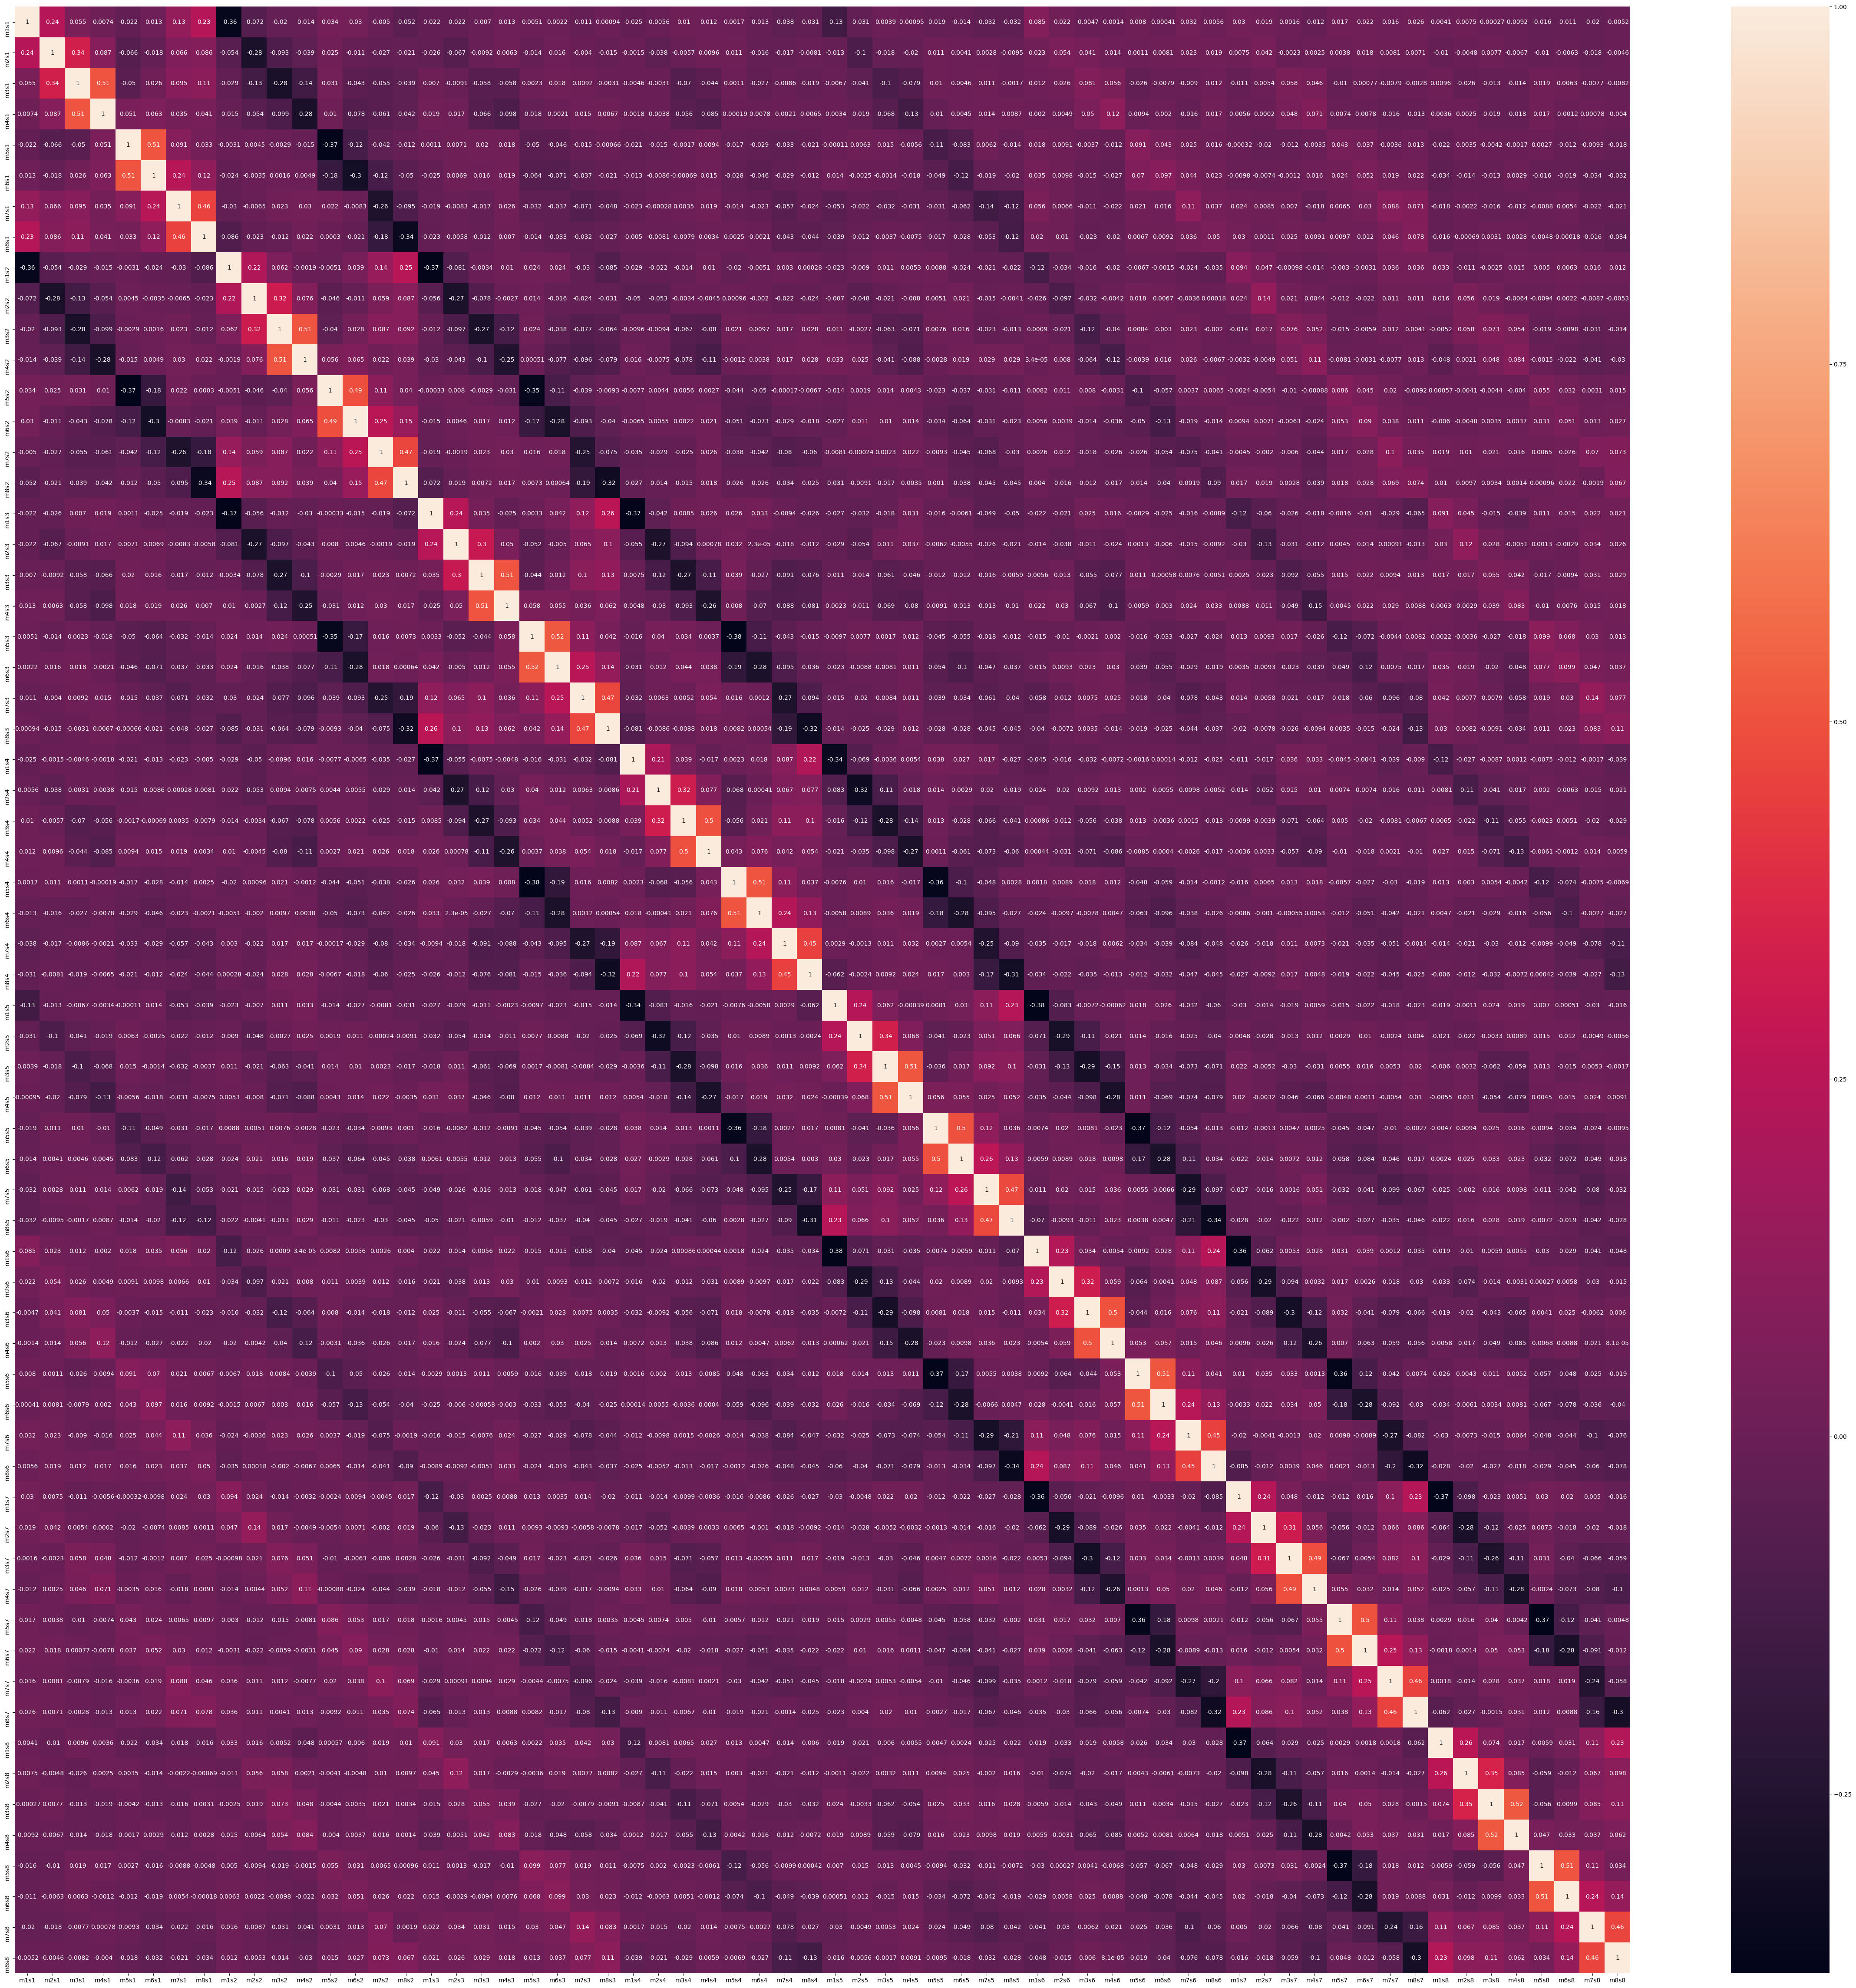

In [10]:
plt.figure(figsize=(60,60), dpi=100)
sns.heatmap(df_without_class.corr(), annot=df_without_class.corr())
plt.show()

Jak wynika z powyższej analizy, zbiór danych składa się z 11674 obiektów. Każdy obiekt opisany jest 65 argumentami. Pierwsze 64 argumenty stanowią pomiary odczytane z 8 czujników przez 8 kolejnych równych przedziałów czasu. Argument 65 wskazuje jaki gest był wykonywany przy danym pomiarze. Istotną obserwacją jest to, iż dane są kompletne, każdy obiekt zawiera komplet argumentów. Spośród wszystkich argumentów wyróżninić można dwa które nie są podobne dla wszystkich klas. Korelacja danych wskazuje, iż pomiar z danego czujnika jest silnie skorelowany z bezpośrednio następnym pomiarem danego czujnika. Poza tym macierz korelacji nie wskazuje żadnych istotnych połączeń.

## Przygotowanie danych

Dane nie wymagają dodatkowego przygotowywania. Wszystkie argument są tak samo znaczące, wszystkie kolumny są kompletne.

## Grupowanie danych, analiza podobieństwa
Przeanalizować podobieństwo między danymi przy pomocy algorytmów grupowania wraz z analizą ilości grup.

Text(0.5, 1.0, 'wynik grupowania')

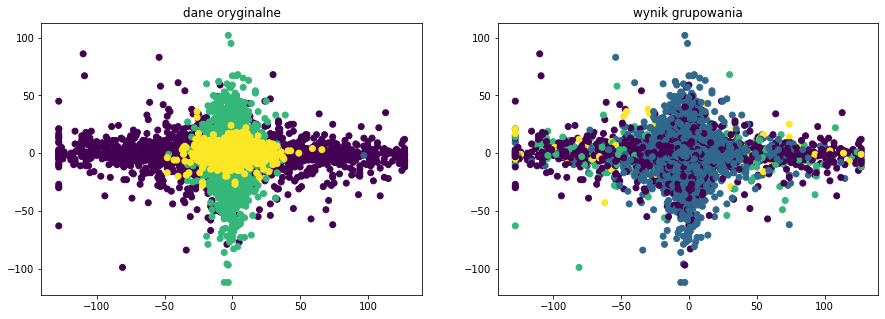

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from sklearn.cluster import AgglomerativeClustering
ile_grup = 4
do_grupowania = df


model = AgglomerativeClustering(n_clusters=ile_grup)
model.fit(do_grupowania)

klasa = df['class'].astype('category').cat.codes
grupa = model.labels_

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter( x=df['m7s1'], y=df['m2s5'], c=klasa)
plt.title('dane oryginalne')
plt.subplot(1,2,2)
do_grupowania['grupa']=  model.labels_
plt.scatter( x=do_grupowania['m7s1'], y=do_grupowania['m2s5'], c=grupa)
plt.title('wynik grupowania')

## Testowanie wybranych klasyfikatorów
Sprawdzenie wybranych klasyfikatorów pod kątem doboru ich parametrów.

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels


/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Podział zbioru danych na argumenty i wyniki, podział na dane treningowe i testowe.

In [7]:
X = df.drop(['class'], axis=1)
X = StandardScaler().fit_transform(X)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)


Dodanie funkcji wyświetlającej macierz błędu

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,title=None, cmap=plt.cm.Blues):
    
    if not title:
        title="Macierz błędu"

    
    confusion = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(confusion, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(confusion.shape[1]),
           yticks=np.arange(confusion.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Prawdziwa klasa',
           xlabel='Przewidziana klasa')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = 'd'
    thresh = confusion.max() / 2.
    for i in range(confusion.shape[0]):
        for j in range(confusion.shape[1]):
            ax.text(j, i, format(confusion[i, j], fmt),
                    ha="center", va="center",
                    color="white" if confusion[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


### Klasyfikator KNN - klasyfikacja na podstawie 10 najbliższych sąsiadów

Skuteczność:  0.645083932853717 

             precision    recall  f1-score   support

       rock       0.96      0.57      0.72       718
   scissors       0.55      0.96      0.70       761
      paper       0.80      0.25      0.38       685
         ok       0.61      0.75      0.67       755

avg / total       0.72      0.65      0.62      2919



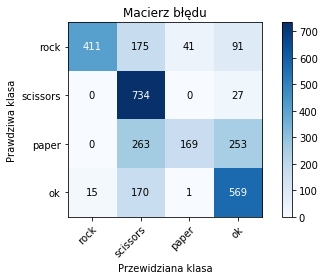

In [61]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

### Klasyfikator KNN - klasyfikacja na podstawie 100 najbliższych sąsiadów

Skuteczność:  0.5549845837615622 

             precision    recall  f1-score   support

       rock       1.00      0.30      0.46       718
   scissors       0.49      0.98      0.66       761
      paper       0.79      0.10      0.17       685
         ok       0.54      0.78      0.64       755

avg / total       0.70      0.55      0.49      2919



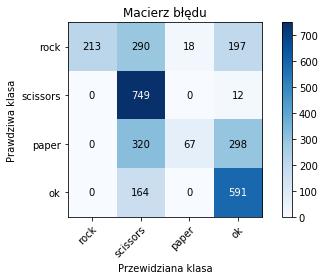

In [62]:
knn = KNeighborsClassifier(100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

#### Wnioski podsumowujące klasyfikator KNN:

Klasyfikator słabo radzi sobie z tak wielowymiarowymi danymi. Wraz ze wzrostem liczby sąsiadów, do których nowy punkt jest porównywany wzrasta potrzebny czas na realizację uczenia i predykcji, a przy znacznie większej liczbie sąsiadów dokładność klasyfikacji spada.

### Klasyfikator SVC - Support Vector Classification, liniowe jądro.

Skuteczność:  0.34669407331277835 

             precision    recall  f1-score   support

       rock       0.77      0.28      0.41       718
   scissors       0.33      0.44      0.38       761
      paper       0.26      0.39      0.31       685
         ok       0.32      0.28      0.30       755

avg / total       0.42      0.35      0.35      2919



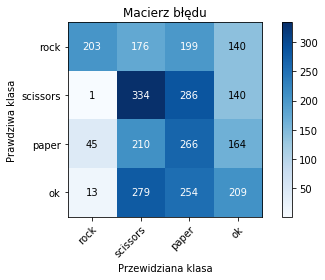

In [11]:
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
score = svc.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

### Klasyfikator SVC - Support Vector Classification, jądro RBF (Radial Basis Function)

Skuteczność:  0.8989379924631723 

             precision    recall  f1-score   support

       rock       0.93      0.91      0.92       718
   scissors       0.88      0.98      0.93       761
      paper       0.93      0.86      0.89       685
         ok       0.86      0.85      0.85       755

avg / total       0.90      0.90      0.90      2919



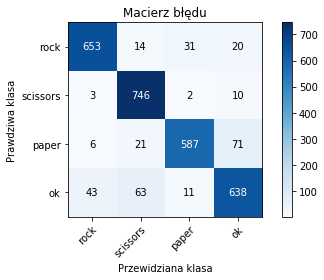

In [12]:
svc_rbf = SVC(kernel="rbf")
svc_rbf.fit(X_train, y_train)
y_pred = svc_rbf.predict(X_test)
score = svc_rbf.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

#### Wnioski podsumowujące klasyfikator SVC

Klasyfikator przy wybraniu jądra RBF osiąga wyniki prawie 90% skuteczności co można nazwć wynikiem zadowalającym. Tryb liniowy dla tak wielowymiarowych danych jest rażąco nieodpowiedni, stąd tak niski wynik skuteczności klasyfikatora. 

### Klasyfikator Drzewa Decyzyjnego - DTC, bez sprecyzowanej głębokości maksymalnej, kryterium 'gini'.

Skuteczność:  0.7745803357314148 

             precision    recall  f1-score   support

       rock       0.85      0.87      0.86       718
   scissors       0.80      0.80      0.80       761
      paper       0.75      0.76      0.75       685
         ok       0.70      0.68      0.69       755

avg / total       0.77      0.77      0.77      2919



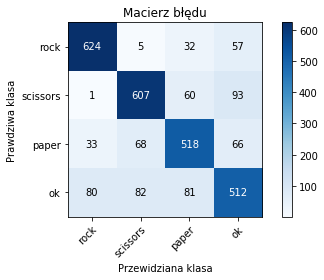

In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

### Klasyfikator Drzewa Decyzyjnego - DTC, ze sprecyzowaną głębokością maksymalną, kryterium 'gini'.

Skuteczność:  0.7951353203151764 

             precision    recall  f1-score   support

       rock       0.86      0.85      0.86       718
   scissors       0.81      0.85      0.83       761
      paper       0.79      0.76      0.78       685
         ok       0.71      0.72      0.72       755

avg / total       0.80      0.80      0.80      2919



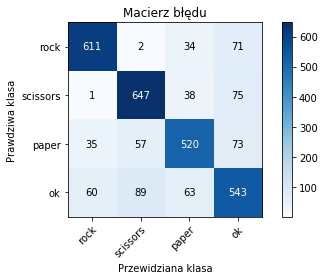

In [21]:
dtc = DecisionTreeClassifier(max_depth=17)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

### Klasyfikator Drzewa Decyzyjnego - DTC, ze sprecyzowaną głębokością maksymalną, kryterium 'entropia'.

Skuteczność:  0.8054128126070572 

             precision    recall  f1-score   support

       rock       0.89      0.87      0.88       718
   scissors       0.82      0.86      0.84       761
      paper       0.76      0.76      0.76       685
         ok       0.75      0.72      0.74       755

avg / total       0.81      0.81      0.81      2919



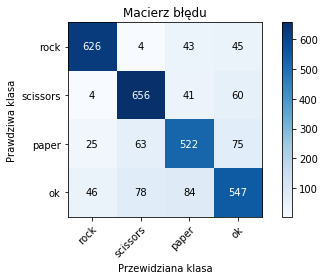

In [35]:
dtc = DecisionTreeClassifier(max_depth=18, criterion='entropy')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

#### Wnioski podsumowujące klasyfikator drzewa decyzyjnego.

Drzewo decyzyjne znacznei lepiej radzi sobie na zbiorach, w których dane są powtarzalne, jednak jak widać, na wielowymiarowym zbiorze także osiąga całkiem niezłe wyniki - 80% (może nie najlepiej, ale jako tako)
Po zmianie kryterium na kryterium entropii zauważalny jest kilku procętowy wzrost dokładności przewidywania - to samo dzieje się w momencie sprecyzowania maksymalnej głębokości drzewa. Samo sprecyzowanie pozwala nam na uniknięcie overfittingu.

### Klasyfikator wykorzystujący sieć neuronową.

Skuteczność:  0.9307982185680027 

             precision    recall  f1-score   support

       rock       0.96      0.95      0.95       718
   scissors       0.94      0.95      0.95       761
      paper       0.93      0.91      0.92       685
         ok       0.90      0.91      0.90       755

avg / total       0.93      0.93      0.93      2919



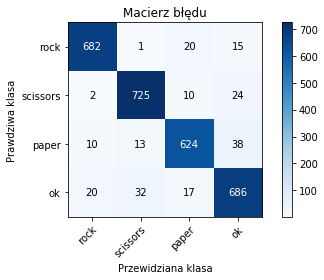

In [63]:
nn = MLPClassifier(hidden_layer_sizes=50, max_iter=1000)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
score = nn.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

### Klasyfikator wykorzystujący sieć neuronową - zwiękoszona liczba neuronów warstw ukrytych.

Skuteczność:  0.9438163754710517 

             precision    recall  f1-score   support

       rock       0.97      0.96      0.97       718
   scissors       0.94      0.96      0.95       761
      paper       0.94      0.93      0.93       685
         ok       0.92      0.92      0.92       755

avg / total       0.94      0.94      0.94      2919



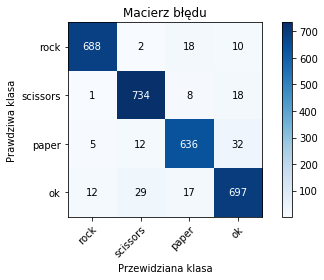

In [64]:
nn = MLPClassifier(hidden_layer_sizes=100, max_iter=1000)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
score = nn.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

### Klasyfikator AdaBoost

Skuteczność:  0.8701610140459062 

             precision    recall  f1-score   support

       rock       0.95      0.89      0.92       718
   scissors       0.85      0.93      0.89       761
      paper       0.88      0.87      0.87       685
         ok       0.81      0.79      0.80       755

avg / total       0.87      0.87      0.87      2919



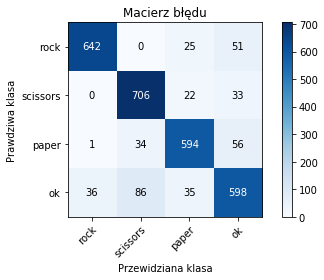

In [58]:
aclf = AdaBoostClassifier(n_estimators=150, learning_rate=0.9)
aclf.fit(X_train, y_train)
y_pred = aclf.predict(X_test)
score = aclf.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

### Naiwny klasyfikator bayesowski - GaussianNB

Skuteczność:  0.8890030832476875 

             precision    recall  f1-score   support

       rock       0.91      0.92      0.91       718
   scissors       0.86      0.96      0.90       761
      paper       0.96      0.91      0.93       685
         ok       0.85      0.77      0.81       755

avg / total       0.89      0.89      0.89      2919



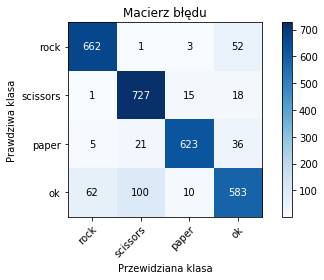

In [59]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score = nb.score(X_test, y_test)
target_names=['rock','scissors','paper','ok']

print("Skuteczność: ", score, "\n" )
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, classes=target_names)
plt.show()

## Ocena przydatności danych
Ocenienie czy do poprawnej klasyfikacji należy wykorzystać wszystkie atrybuty, czy wystarczy ich podzbiór, czy należy stworzyć jakieś nowe dane w oparciu o istniejące. 